In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.utilities import Pareto_split

In [2]:
def image_infill(x, F=None, front_value = 0., n_contours=20):
    #figure_properties
    fig = plt.figure(figsize=[9,7])
    ax = fig.gca()
    ax.set_xlim([0,1.5])
    ax.set_ylim([0,1.5])
    
    
    p, d = Pareto_split(x)
    
    # compute infill
    M, N = 100, 100
    x = np.linspace(0, 1.5, M)
    y = np.linspace(0, 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    
    if F == None:
        F = lambda x: np.zeros(x.shape[0])
    zz = F(xy)
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz, alpha=0.8)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(d[:,0], d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(p[:,0], p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(front_legend)
    labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

In [3]:
np.random.seed(6)
y = np.random.uniform(1,10,size = (12,2))
y = np.array([[0.1, 0.95], [0.2, 0.5], [0.35, 0.3], [0.44, 0.25], [0.5, 0.15], [0.78, 0.12], [1.1, 0.05], [0.6, 0.8], [1.2, 0.4]])

invert_functions = True

(10, 5)
(10, 2)


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -5.745055496774679
Optimization restart 2/10, f = -5.745102234010036
Optimization restart 3/10, f = -5.745058236510779
Optimization restart 4/10, f = -5.745078630980771
Optimization restart 5/10, f = -5.745065395473456
Optimization restart 6/10, f = -5.745076839398594
Optimization restart 7/10, f = -5.745090281188002
Optimization restart 8/10, f = -5.745040235547908


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 9/10, f = -5.745116474187759
Optimization restart 10/10, f = -5.745090254774022


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 14.189381196848188
Optimization restart 2/10, f = -5.7450777463817495
Optimization restart 3/10, f = -5.745053142177482
Optimization restart 4/10, f = -5.745110635190821
Optimization restart 5/10, f = -5.745103459763041
Optimization restart 6/10, f = -5.745076679084786
Optimization restart 7/10, f = -5.745074880984426
Optimization restart 8/10, f = -5.745099639739282
Optimization restart 9/10, f = -5.745118286917497
Optimization restart 10/10, f = -5.745091786566419


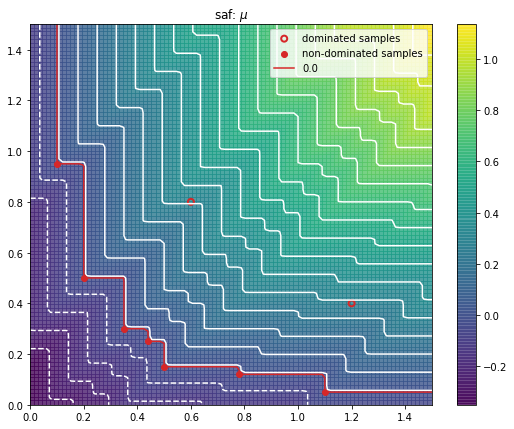

In [4]:
from testsuite.optimisers import Saf

saf_opt = Saf(objective_function=lambda x: x[:,0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=None)
saf_opt.y = y
F_saf = lambda x_q: saf_opt.saf(x_q, Pareto_split(y)[0], invert=invert_functions)
fig_saf = image_infill(x=y, F=F_saf)
fig_saf.axes[0].set_title("saf: $\mu$");

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


(10, 5)
(10, 2)
Optimization restart 1/10, f = 14.189385532931485
Optimization restart 2/10, f = -5.565569248616541
Optimization restart 3/10, f = -5.565581736693604
Optimization restart 4/10, f = -5.565610208744454
Optimization restart 5/10, f = -5.565604103228197
Optimization restart 6/10, f = -5.565607013733231
Optimization restart 7/10, f = -5.565599223163607
Optimization restart 8/10, f = -5.565562596006751
Optimization restart 9/10, f = -5.565598305519636


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -5.565604790214447
Optimization restart 1/10, f = -5.565560188112805
Optimization restart 2/10, f = -5.565607687131532
Optimization restart 3/10, f = -5.565601584491331
Optimization restart 4/10, f = -5.565629340283444
Optimization restart 5/10, f = -5.565587366798046
Optimization restart 6/10, f = -5.552991196989032
Optimization restart 7/10, f = -5.565633228467412
Optimization restart 8/10, f = -5.565613711563563
Optimization restart 9/10, f = -5.565607422127231
Optimization restart 10/10, f = -5.565564816477497


Text(0.5, 1.0, 'saf: ei')

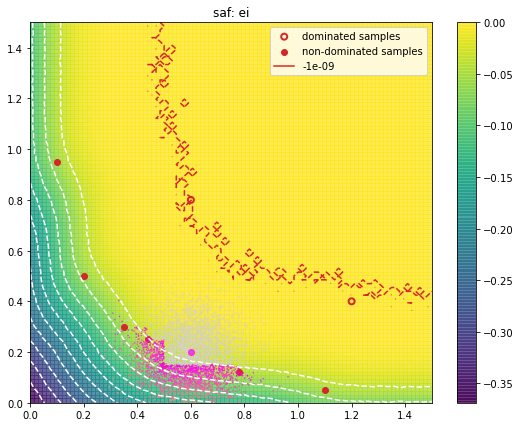

In [5]:
from testsuite.optimisers import Saf
from testsuite.surrogates import GP, MultiSurrogate

saf_opt = Saf(objective_function=lambda x: x[:,0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=None)
saf_opt.y = y
saf_opt.Pareto_indices = Pareto_split(y, return_indices=True)
saf_opt.p = saf_opt.y[saf_opt.Pareto_indices[0]]
saf_opt.d = saf_opt.y[saf_opt.Pareto_indices[1]]

uncertainty = 0.10
n_samples=5000
F_safei = lambda x_q: np.array([saf_opt.saf_ei(x_qi, np.ones_like(x_qi)*uncertainty, n_samples=n_samples) for x_qi in x_q])

front_value = 1e-9
if invert_functions:
    front_value*=-1
    
fig_safei = image_infill(x=y, F=F_safei, n_contours=10, front_value=front_value)

q_point = np.array([[0.6, 0.2]])
q_point_std = uncertainty
q_scatter, q_scat_values = saf_opt.saf_ei(q_point, np.ones_like(q_point)*q_point_std, n_samples=n_samples, return_samples=True)
colors = q_scat_values
fig_safei.axes[0].scatter(q_scatter[q_scat_values<0,0], q_scatter[q_scat_values<0,1], c=colors[q_scat_values<0], cmap="spring_r", s=0.2)
fig_safei.axes[0].scatter(q_scatter[q_scat_values>=0,0], q_scatter[q_scat_values>=0,1], c="lightgray", s=0.2, alpha=0.7)
put = fig_safei.axes[0].scatter(q_point[0, 0], q_point[0, 1], c="magenta", alpha=0.7)

fig_safei.axes[0].set_title("saf: ei")

(10, 5)
(10, 2)


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 14.189385455793614
Optimization restart 2/10, f = -4.678434611376899
Optimization restart 3/10, f = -4.678428640229953
Optimization restart 4/10, f = -4.678427648109056
Optimization restart 5/10, f = -4.67842440219167
Optimization restart 6/10, f = -4.678445858416281
Optimization restart 7/10, f = -4.678430850702573


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = -4.678442381570122
Optimization restart 9/10, f = -4.678443053731869
Optimization restart 10/10, f = -4.678439231588399
Optimization restart 1/10, f = 14.189384966085163
Optimization restart 2/10, f = -4.678444178270404
Optimization restart 3/10, f = -4.678422944960971
Optimization restart 4/10, f = -4.678434816392656
Optimization restart 5/10, f = -4.67845465048884
Optimization restart 6/10, f = -4.678455195207084
Optimization restart 7/10, f = -4.6784470039055766
Optimization restart 8/10, f = -4.678458244761829
Optimization restart 9/10, f = -4.678453323626972
Optimization restart 10/10, f = -4.678440432815565


Text(0.5, 1.0, 'sms-ego: $\\sigma$=0.0')

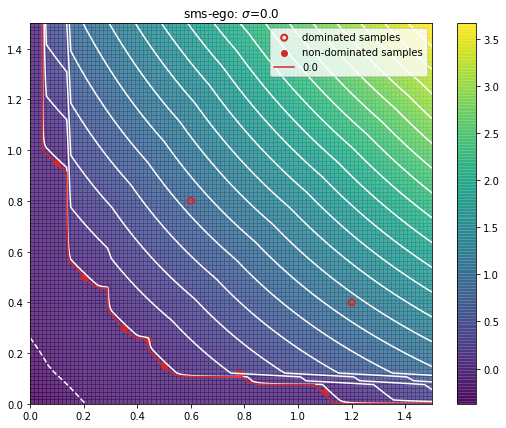

In [9]:
from testsuite.optimisers import SmsEgo
sms_opt = SmsEgo(objective_function=lambda x: x[:,0:2], ei=True, surrogate=MultiSurrogate(GP), limits = [[0, 0, 0, 0, 0], [1,1,1,1,1]])
sms_opt.y = y
sms_opt.Pareto_indices = Pareto_split(y, return_indices=True)
sms_opt.p = saf_opt.y[sms_opt.Pareto_indices[0]]
sms_opt.d = saf_opt.y[sms_opt.Pareto_indices[1]]
sms_opt.currrent_hv = mpoi_opt._compute_hypervolume()

uncertainty = 0.00
sms_opt.current_hv = sms_opt._compute_hypervolume()
F_sms = lambda x_q: np.array([sms_opt._scalarise_y(x_qi.reshape(1, -1), np.ones_like(x_qi.reshape(1, -1))*uncertainty, invert=invert_functions) for x_qi in x_q])
fig_sms = image_infill(x=y, F=F_sms)

fig_sms.axes[0].set_title("sms-ego: $\sigma$={}".format(uncertainty))

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


(10, 5)
(10, 2)
Optimization restart 1/10, f = -6.024305770010769
Optimization restart 2/10, f = -6.0242908726638245
Optimization restart 3/10, f = -6.024320970004993
Optimization restart 4/10, f = -6.0242960041196945
Optimization restart 5/10, f = -6.024330994464969
Optimization restart 6/10, f = -6.0242928380384315
Optimization restart 7/10, f = -6.0243075657606875
Optimization restart 8/10, f = -6.024295348037288
Optimization restart 9/10, f = -6.024288185559668


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -6.024345567824036
Optimization restart 1/10, f = -6.0242573909336805
Optimization restart 2/10, f = -6.0242383914225055
Optimization restart 3/10, f = -6.024234337930344
Optimization restart 4/10, f = -6.024279308666682
Optimization restart 5/10, f = -6.024289090059272
Optimization restart 6/10, f = -6.0242641626309394
Optimization restart 7/10, f = -6.024294256753696
Optimization restart 8/10, f = -6.024196517351311
Optimization restart 9/10, f = -6.024216159421132
Optimization restart 10/10, f = -6.024286123129625


Text(0.5, 1.0, 'mpoi $\\sigma$=0.1')

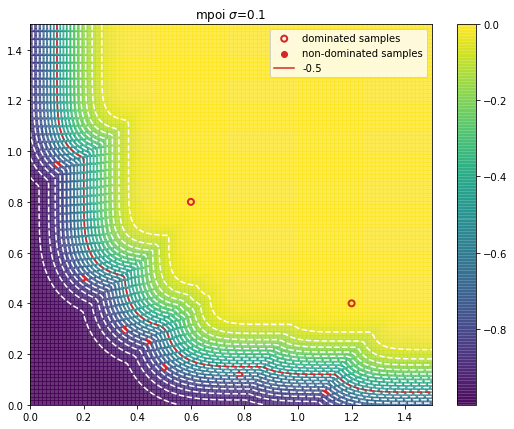

In [7]:
from testsuite.optimisers import Mpoi 
mpoi_opt = Mpoi(objective_function=lambda x: x[:,0:2], surrogate=MultiSurrogate(GP), limits = [[0, 0, 0, 0, 0], [1,1,1,1,1]])

# manually update internal attributes to fit generated y data. 
mpoi_opt.y = y
mpoi_opt.Pareto_indices = Pareto_split(y, return_indices=True)
mpoi_opt.p = saf_opt.y[mpoi_opt.Pareto_indices[0]]
mpoi_opt.d = saf_opt.y[mpoi_opt.Pareto_indices[1]]

uncertainty = 0.1
F_mpoi = lambda x_q: np.array([mpoi_opt._scalarise_y(x_qi.reshape(1, -1), np.ones_like(x_qi.reshape(1, -1))*uncertainty, invert=invert_functions) for x_qi in x_q])
front_value = 0.5
if invert_functions: 
    front_value *=-1 
fig_mpoi = image_infill(x=y, F=F_mpoi, front_value=front_value)

fig_mpoi.axes[0].set_title("mpoi $\sigma$={}".format(uncertainty))